In [1]:
#This program attempts to optimize a users portfolio using the efficient frontier    

In [2]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#### Get stock symbols / Tickers in the portfolio
# FAANG
N = int(input("Enter the number of stocks you want in your portfolio:"))
assets = []
for i in range(N):
    x = input(f"Enter the ticker symbol of your stock {i+1}:")
    assets.append(x)

First Methord: The Law of Large Numbers methord.
We Create 1000s of weights randomly and assign these weights to the portfolio next we compute the return risk and sharpe ratio for these weights and maximize the sharpe ratio for the corresponding weights, and return the weights that maximized the sharpe ratio.

In [4]:
### get the stock/portfolio start date and end date
startdate = input("Enter the start date to the the historical data in (yyyy-mm-dd) format")
enddate = datetime.today().strftime('%Y-%m-%d')

In [5]:
### read the data from yahoo
df = pdr.get_data_yahoo(assets, start=startdate, end=enddate)['Adj Close']


In [6]:
##visually show the stock/portfolio
std= df/df.iloc[0]*100
#std_prices = df/df[0]

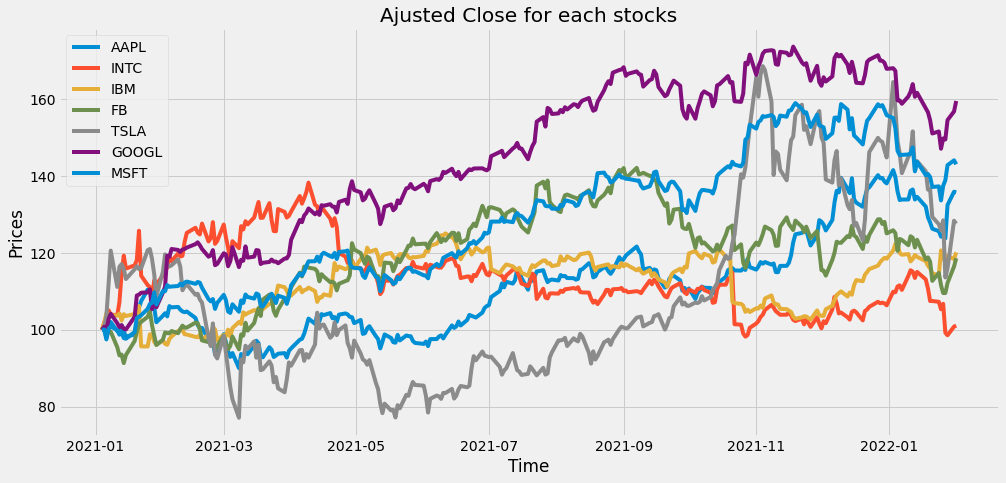

In [7]:

plt.figure(figsize=(15,7))
plt.plot(std)
plt.title('Ajusted Close for each stocks')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend(assets, loc= 'upper left')
plt.show()


In [8]:
### show daily simple returns
daily_ret = np.log(df/df.shift(1)).dropna()
daily_ret

Symbols,AAPL,INTC,IBM,FB,TSLA,GOOGL,MSFT
Date,,,,,,,
2021-01-05,0.012288,0.018748,0.017595,0.007520,0.007291,0.008032,0.000964
2021-01-06,-0.034241,0.009635,0.024666,-0.028676,0.027995,-0.009917,-0.026271
2021-01-07,0.033554,0.021106,-0.002323,0.020412,0.076448,0.029431,0.028060
2021-01-08,0.008594,-0.010401,-0.003573,-0.004363,0.075481,0.013152,0.006074
2021-01-11,-0.023523,-0.002132,0.000389,-0.040928,-0.081442,-0.023377,-0.009746
...,...,...,...,...,...,...,...
2022-01-26,-0.000563,0.013439,-0.013612,-0.018562,0.020488,0.017942,0.028095
2022-01-27,-0.002948,-0.073022,-0.013045,0.000034,-0.122780,-0.001766,0.010494
2022-01-28,0.067451,-0.006682,0.014831,0.023712,0.020592,0.033134,0.027695


In [9]:
### Annualized mean daily return
mean_ret= daily_ret.mean()*250
mean_ret

Symbols
AAPL     0.280988
INTC     0.010108
IBM      0.168619
FB       0.156896
TSLA     0.224079
GOOGL    0.429013
MSFT     0.328897
dtype: float64

In [10]:
### Create and show annualized covariance matrix 
cov_matrix_annual = daily_ret.cov()*250
cov_matrix_annual

Symbols,AAPL,INTC,IBM,FB,TSLA,GOOGL,MSFT
Symbols,,,,,,,
AAPL,0.065520,0.029146,0.003622,0.039477,0.069756,0.036198,0.037720
INTC,0.029146,0.102957,0.019531,0.034203,0.066836,0.029474,0.024197
IBM,0.003622,0.019531,0.054706,0.002564,-0.000033,0.002019,-0.001537
FB,0.039477,0.034203,0.002564,0.090047,0.056269,0.044512,0.034358
TSLA,0.069756,0.066836,-0.000033,0.056269,0.326058,0.046364,0.051006
GOOGL,0.036198,0.029474,0.002019,0.044512,0.046364,0.060515,0.039575
MSFT,0.037720,0.024197,-0.001537,0.034358,0.051006,0.039575,0.047512


In [11]:
#### Creating the 1000 diffrent weights

np.random.seed(1)
a1 = np.random.rand(2000,N)
for i in range(len(a1)):
    a1[i]= a1[i]/np.sum(a1[i])


In [12]:
### Creating an empty dataframe to store parameters
ret = np.zeros(len(a1))  ### Stores portfolio annual expected return
risk = np.zeros(len(a1)) ### Stored the std dev of the portfolio
sharpe = np.zeros(len(a1)) ### stored the sharpe ratio of the portfolio
result = pd.DataFrame({"Return": ret , "Risk": risk ,"Sharpe":sharpe})

In [13]:
### Get current live 13 Week T- Bill yield
from yahoo_fin import stock_info as si
rf = si.get_live_price('^IRX')/100
rf

0.002029999941587448

In [14]:
for i in range(len(a1)):
    result["Return"][i]= np.dot(a1[i], mean_ret)
    result["Risk"][i] = np.dot(a1[i].T, np.dot(cov_matrix_annual,a1[i]))
    result['Sharpe'][i] = (result['Return'][i] -rf)/result['Risk'][i]

In [15]:
result

,Return,Risk,Sharpe
0,0.163887,0.052629,3.075445
1,0.227154,0.046682,4.822529
2,0.196334,0.036348,5.345573
3,0.201409,0.055166,3.614184
4,0.216028,0.065222,3.281059
...,...,...,...
1995,0.223913,0.043597,5.089429
1996,0.249233,0.041559,5.948207
1997,0.274935,0.064922,4.203591
1998,0.183463,0.046505,3.901364


Text(0.5, 1.0, 'Risk Return Scatter for portfolio   ')

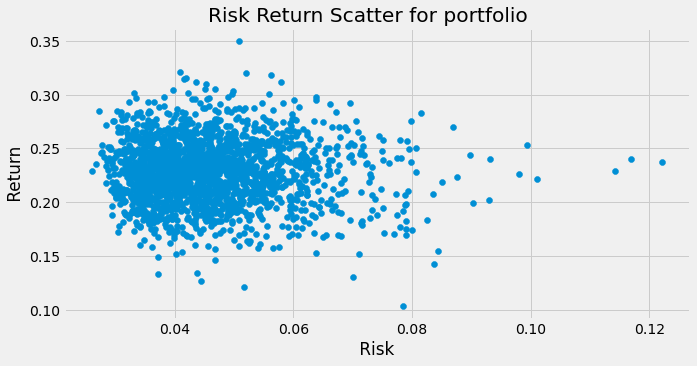

In [30]:
### Plot the result data frame risk vs return 
plt.figure(figsize=(10,5))
plt.scatter(x= result['Risk'], y= result['Return'])
plt.xlabel(" Risk ")
plt.ylabel(" Return ")
plt.title("Risk Return Scatter for portfolio   ")


In [17]:
index  = result['Sharpe'].idxmax()
result.iloc[index]

Return     0.284893
Risk       0.027311
Sharpe    10.357125
Name: 1741, dtype: float64

In [18]:
s1=pd.Series(data= a1[index], index= df.columns)
s1

Symbols
AAPL     0.032804
INTC     0.060472
IBM      0.316961
FB       0.020519
TSLA     0.015724
GOOGL    0.327870
MSFT     0.225651
dtype: float64

Part 2 : Using Optimization Algorithm to compute the optimal weights

We will use SQLS methord to optimize the weights, we will first defilne a function that returns negative sharpe ratio for a given weight and than minimize this result, 

1. we would have to define the constrains for equality, to make sure that the sum of weights is equal to one.
2. set bouts to make sure we don't have individual weights as greater than one and less than one. 
3. define the optimize function. 

In [19]:
def neg_sharpe(weights):
    ret = np.dot(weights,mean_ret)
    risk = np.dot(weights.T, np.dot(cov_matrix_annual, mean_ret))
    neg_sharpe = -(ret - rf)/risk
    return neg_sharpe

In [20]:
from scipy.optimize import minimize

In [21]:
def sum_weights(weights):
    return np.sum(weights) - 1

In [22]:
constraint=({'type' : 'eq', 'fun': sum_weights})

In [23]:
l=[(0,1)]*N
bound = tuple(l)
bound

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [31]:
a= np.ones(N)/N
a

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [25]:
optimal=minimize(fun=neg_sharpe, bounds=bound, constraints= constraint, method='SLSQP', x0= a)
optimal

     fun: -14.880633402097393
     jac: array([ 66.71745384,  70.17005444,  -0.18133068,  77.70659363,
       164.51736355,  50.94931567,  50.38662028])
 message: 'Optimization terminated successfully'
    nfev: 40
     nit: 6
    njev: 5
  status: 0
 success: True
       x: array([0., 0., 1., 0., 0., 0., 0.])

In [26]:

a3=optimal['x']

In [27]:
s2= pd.Series(data=a3, index=df.columns)
s2

Symbols
AAPL     0.0
INTC     0.0
IBM      1.0
FB       0.0
TSLA     0.0
GOOGL    0.0
MSFT     0.0
dtype: float64

In [28]:
weight_df=pd.DataFrame({"optimal": s2, "simulation":s1})
weight_df

,optimal,simulation
Symbols,,
AAPL,0.0,0.032804
INTC,0.0,0.060472
IBM,1.0,0.316961
FB,0.0,0.020519
TSLA,0.0,0.015724
GOOGL,0.0,0.327870
MSFT,0.0,0.225651


<AxesSubplot:xlabel='Symbols'>

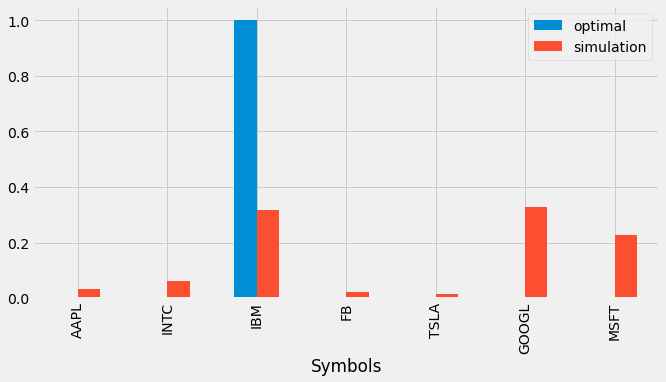

In [29]:
weight_df.plot(kind='bar', figsize=(10,5))